In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train=pd.read_csv(r'C:\Users\ananyya srivastava\Downloads\blacktrain\train.csv')

In [4]:
test=pd.read_csv(r'C:\Users\ananyya srivastava\Downloads\blacktest\test.csv')

In [5]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [7]:
test.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [8]:
train.select_dtypes(include=['object'])

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
0,P00069042,F,0-17,A,2
1,P00248942,F,0-17,A,2
2,P00087842,F,0-17,A,2
3,P00085442,F,0-17,A,2
4,P00285442,M,55+,C,4+
...,...,...,...,...,...
550063,P00372445,M,51-55,B,1
550064,P00375436,F,26-35,C,3
550065,P00375436,F,26-35,B,4+
550066,P00375436,F,55+,C,2


In [9]:
train.select_dtypes(include=['float64'])

,Product_Category_2,Product_Category_3
0,NaN,NaN
1,6.0,14.0
2,NaN,NaN
3,14.0,NaN
4,NaN,NaN
...,...,...
550063,NaN,NaN
550064,NaN,NaN
550065,NaN,NaN
550066,NaN,NaN


In [10]:
train.select_dtypes(include=['int'])

""
0
1
2
3
4
...
550063
550064
550065
550066


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [12]:
# Impute missing values

train = train.fillna(0)
test = test.fillna(0)


In [13]:
train['Product_Category_2'].value_counts()

0.0     173638
8.0      64088
14.0     55108
2.0      49217
16.0     43255
15.0     37855
5.0      26235
4.0      25677
6.0      16466
11.0     14134
17.0     13320
13.0     10531
9.0       5693
12.0      5528
10.0      3043
3.0       2884
18.0      2770
7.0        626
Name: Product_Category_2, dtype: int64

In [14]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,6.735436,3.841941,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,6.215492,6.250712,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,0.000000,0.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,0.000000,0.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,5.000000,0.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,14.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [15]:
train.Age.value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [16]:
map1={'26-35': 30,'36-45':41,'18-25':22,'46-50':48,'51-55':52,'55+':60,'0-17':15}
train['Age']=train['Age'].map(map1)

In [17]:
map2={'26-35': 30,'36-45':41,'18-25':22,'46-50':48,'51-55':52,'55+':60,'0-17':15}
test['Age']=test['Age'].map(map2)

In [18]:
test.Age.value_counts()

30    93428
41    46711
22    42293
48    19577
52    16283
60     9075
15     6232
Name: Age, dtype: int64

In [19]:
train.Age.value_counts()

30    219587
41    110013
22     99660
48     45701
52     38501
60     21504
15     15102
Name: Age, dtype: int64

In [20]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,15,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,15,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,15,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,15,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,60,16,C,4+,0,8,0.0,0.0,7969


C:\Users\ananyya srivastava\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


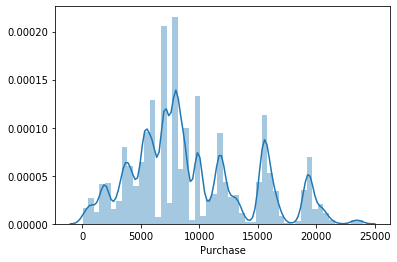

In [21]:
sns.distplot(train['Purchase'])

In [22]:
train.Occupation.value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

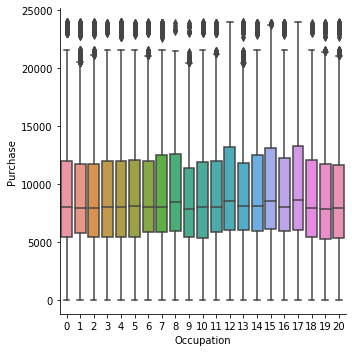

In [23]:
sns.catplot(x='Occupation',y='Purchase',kind='box',data=train)

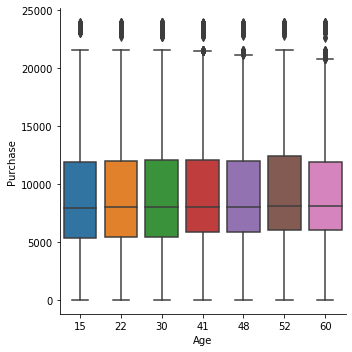

In [24]:
sns.catplot(x='Age',y='Purchase',kind='box',data=train)

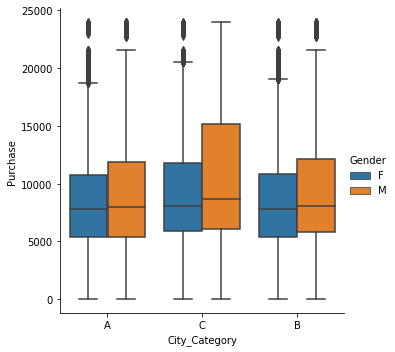

In [25]:
sns.catplot(x='City_Category',y='Purchase',kind='box',hue='Gender',data=train)

C:\Users\ananyya srivastava\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


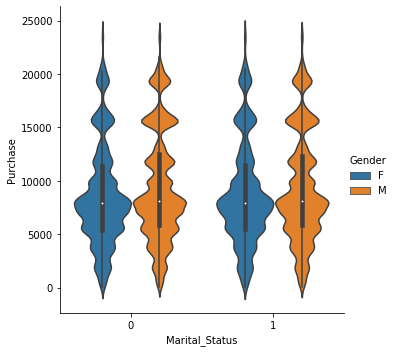

In [26]:
sns.catplot(x='Marital_Status',y='Purchase',kind='violin',hue='Gender',data=train)

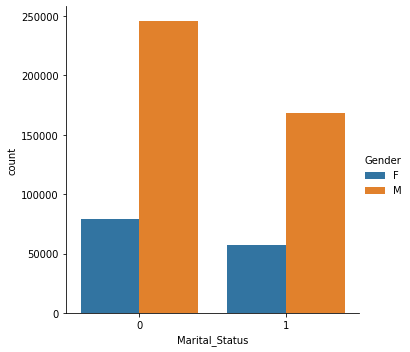

In [27]:
sns.catplot(x='Marital_Status',kind='count',hue='Gender',data=train)

In [28]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,15,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,15,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,15,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,15,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,60,16,C,4+,0,8,0.0,0.0,7969


In [29]:
train.Stay_In_Current_City_Years.value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

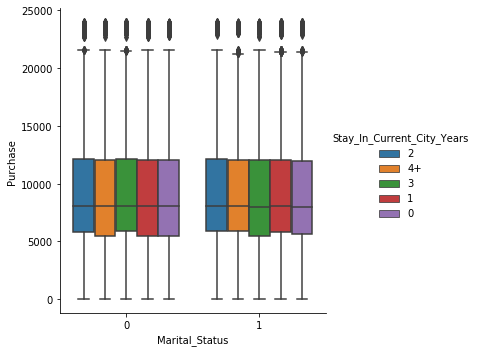

In [30]:
sns.catplot(x='Marital_Status',y='Purchase',kind='box',hue='Stay_In_Current_City_Years',data=train)

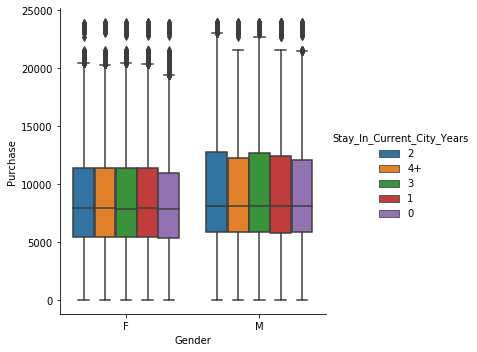

In [31]:
sns.catplot(x='Gender',y='Purchase',kind='box',hue='Stay_In_Current_City_Years',data=train)

C:\Users\ananyya srivastava\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


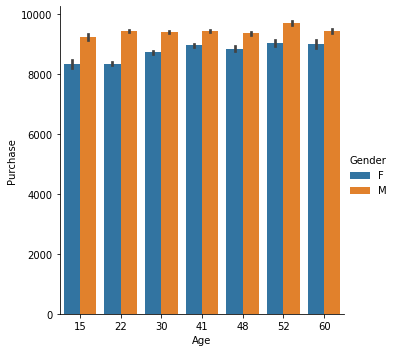

In [32]:
sns.catplot(x='Age',y='Purchase',kind='bar',hue='Gender',data=train)

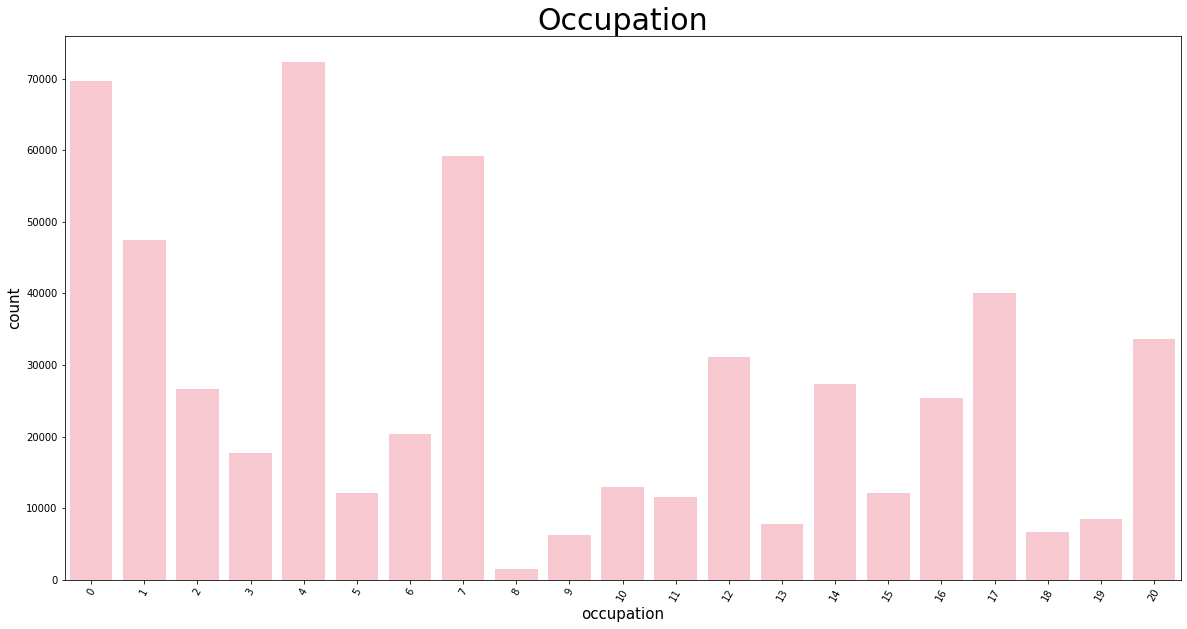

In [33]:
# checking the different regions of the company

plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(train['Occupation'], color = 'pink')
plt.title('Occupation', fontsize = 30)
plt.xticks(rotation = 60)
plt.xlabel('occupation', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()

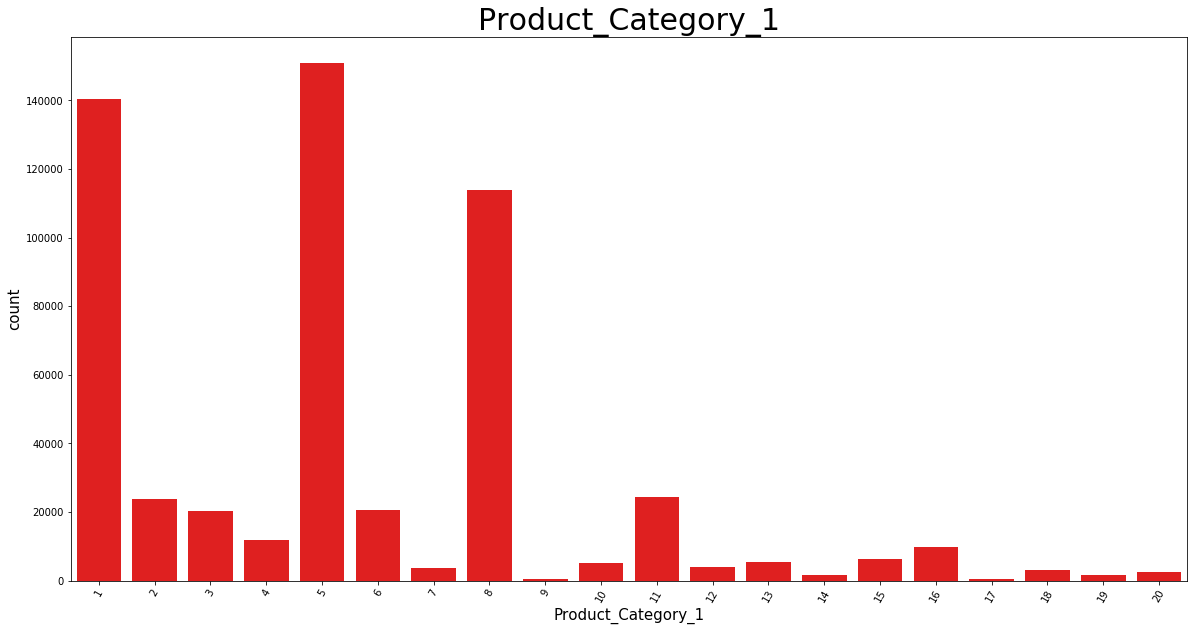

In [34]:
# checking the different regions of the company

plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(train['Product_Category_1'], color = 'red')
plt.title('Product_Category_1', fontsize = 30)
plt.xticks(rotation = 60)
plt.xlabel('Product_Category_1', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()

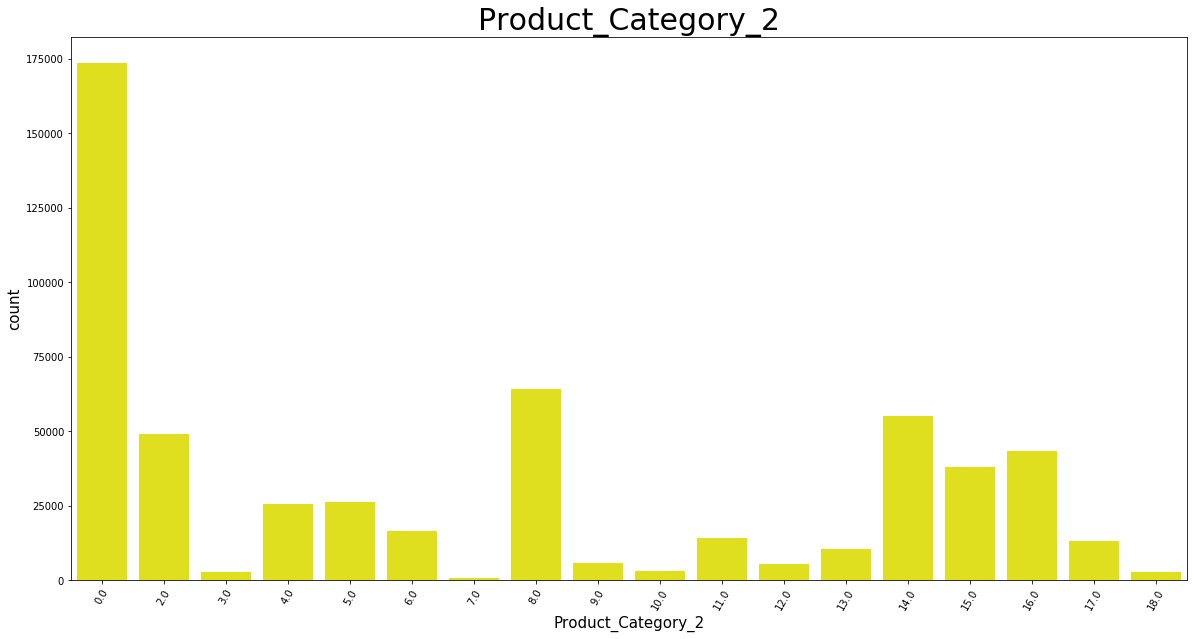

In [35]:
# checking the different regions of the company

plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(train['Product_Category_2'], color = 'yellow')
plt.title('Product_Category_2', fontsize = 30)
plt.xticks(rotation = 60)
plt.xlabel('Product_Category_2', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()

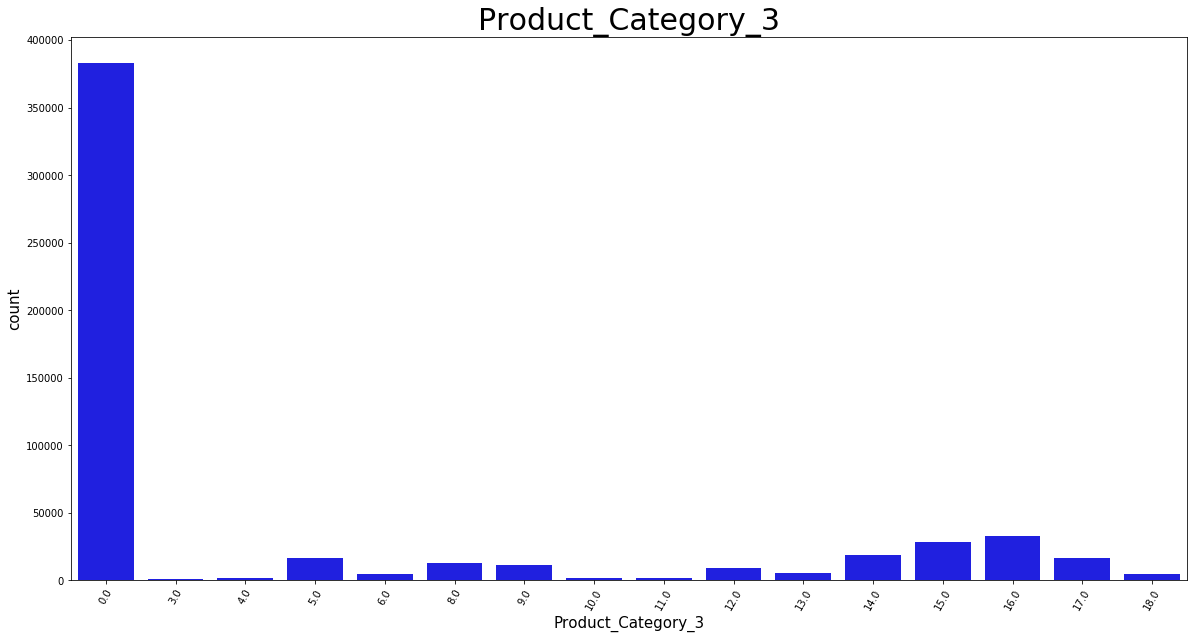

In [36]:
# checking the different regions of the company

plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(train['Product_Category_3'], color = 'blue')
plt.title('Product_Category_3', fontsize = 30)
plt.xticks(rotation = 60)
plt.xlabel('Product_Category_3', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()

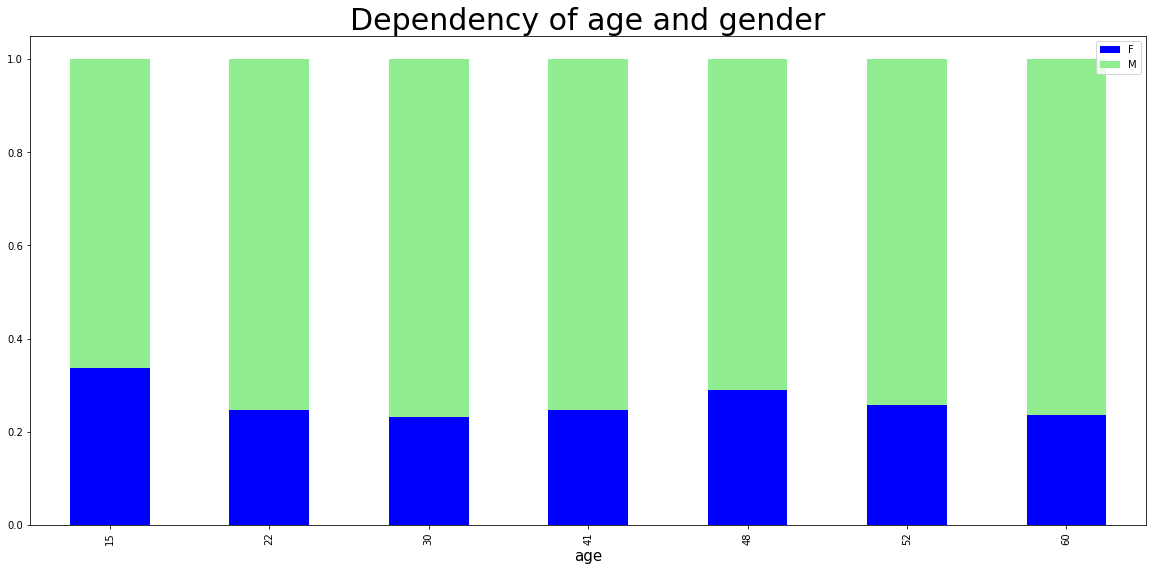

In [37]:
# scatter plot between average training score and is_promoted

data = pd.crosstab(train.Age,train.Gender)
data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 9), color = ['blue', 'lightgreen'])

plt.title('Dependency of age and gender', fontsize = 30)
plt.xlabel('age', fontsize = 15)
plt.legend()
plt.show()

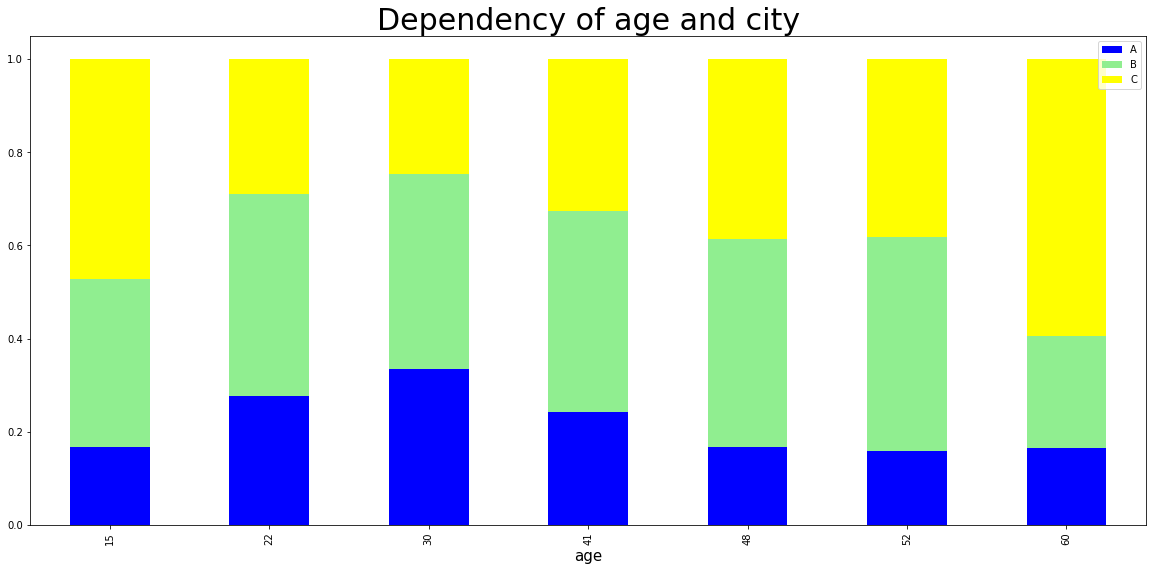

In [38]:
# scatter plot between average training score and is_promoted

data = pd.crosstab(train.Age,train.City_Category)
data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 9), color = ['blue', 'lightgreen','yellow'])

plt.title('Dependency of age and city', fontsize = 30)
plt.xlabel('age', fontsize = 15)
plt.legend()
plt.show()

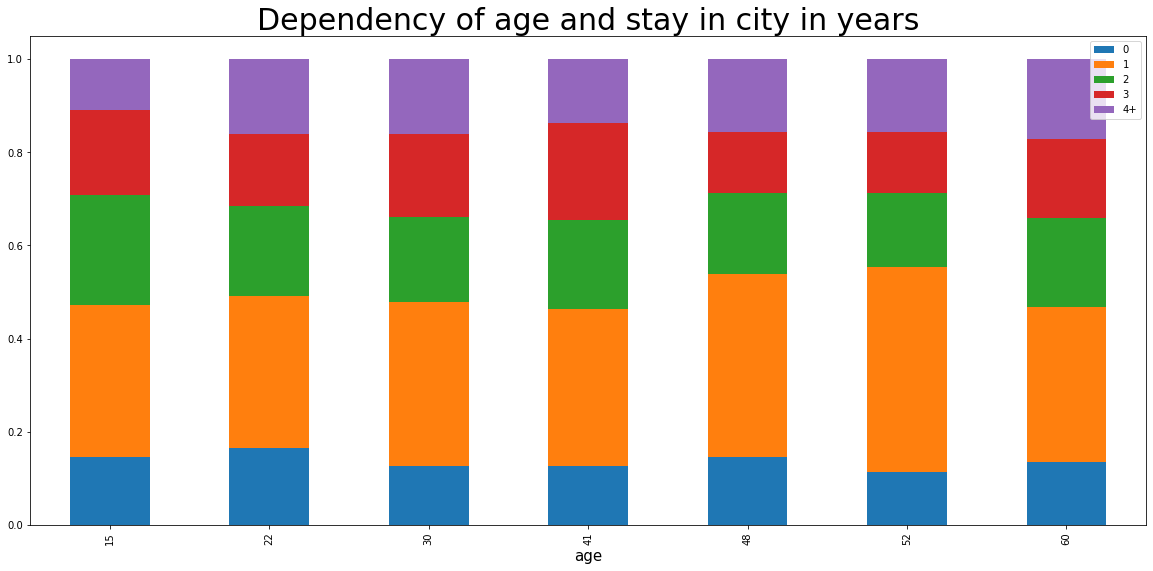

In [39]:
# scatter plot between average training score and is_promoted

data = pd.crosstab(train.Age,train.Stay_In_Current_City_Years)
data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 9))

plt.title('Dependency of age and stay in city in years', fontsize = 30)
plt.xlabel('age', fontsize = 15)
plt.legend()
plt.show()

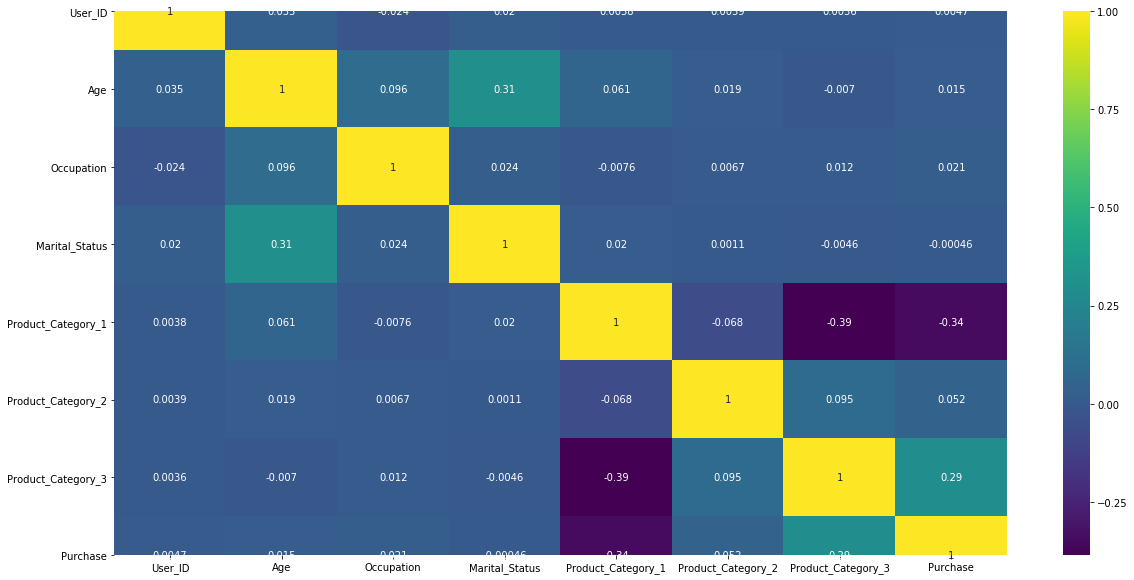

In [40]:
plt.figure(figsize=(20,10)) 
sns.heatmap(data=train.corr(), annot=True, cmap='viridis')

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

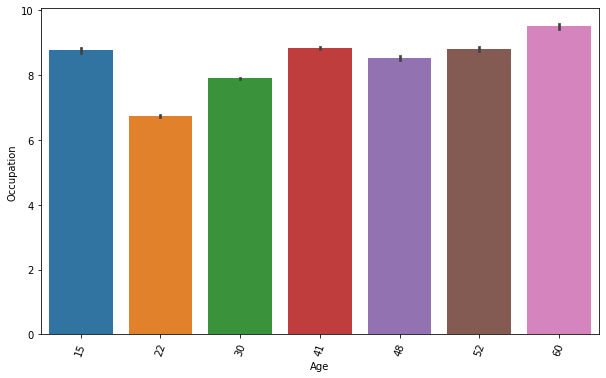

In [41]:
plt.figure(figsize = (10,6))
sns.barplot(x='Age', y = 'Occupation', data = train)
plt.xticks(rotation = '70')

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
lb=LabelEncoder()
train['Product_ID']=lb.fit_transform(train['Product_ID'])

In [44]:
train.dtypes

User_ID                         int64
Product_ID                      int64
Gender                         object
Age                             int64
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [45]:
lbt=LabelEncoder()
test['Product_ID']=lbt.fit_transform(test['Product_ID'])

In [46]:
train.Stay_In_Current_City_Years.value_counts()               

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [47]:
map3={'0':0,'1':1,'2':2,'3':3,'4+':4}
train['Stay_In_Current_City_Years']=train['Stay_In_Current_City_Years'].map(map3)


In [48]:
map3={'0':0,'1':1,'2':2,'3':3,'4+':4}

In [49]:
train.Stay_In_Current_City_Years

0         2
1         2
2         2
3         2
4         4
         ..
550063    1
550064    3
550065    4
550066    2
550067    4
Name: Stay_In_Current_City_Years, Length: 550068, dtype: int64

In [50]:
map4={'0':0,'1':1,'2':2,'3':3,'4+':4}
test['Stay_In_Current_City_Years']=test['Stay_In_Current_City_Years'].map(map4)

In [51]:
map5={'A':1,'B':2,'C':3}
train['City_Category']=train['City_Category'].map(map5)

In [52]:
map6={'A':1,'B':2,'C':3}
test['City_Category']=test['City_Category'].map(map6)

In [53]:
map7={'F':0,'M':1}
train['Gender']=train['Gender'].map(map7)

In [54]:
map8={'F':0,'M':1}
test['Gender']=test['Gender'].map(map8)

In [55]:
train.dtypes

User_ID                         int64
Product_ID                      int64
Gender                          int64
Age                             int64
Occupation                      int64
City_Category                   int64
Stay_In_Current_City_Years      int64
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [56]:
test.dtypes

User_ID                         int64
Product_ID                      int64
Gender                          int64
Age                             int64
Occupation                      int64
City_Category                   int64
Stay_In_Current_City_Years      int64
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
dtype: object

In [57]:
#from sklearn.preprocessing import StandardScaler

In [58]:
from sklearn.metrics import accuracy_score as acc
from sklearn.model_selection import train_test_split



In [59]:
x = train.drop(['Purchase'], axis=1)
y = train[['Purchase']]
x_test = test
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.20, random_state=42, shuffle=True)

In [60]:
# standard scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_val  = sc.transform(x_val)
x_test = sc.transform(x_test)



In [61]:
test.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
dtype: int64

In [62]:
from sklearn.ensemble import RandomForestRegressor
mm=RandomForestRegressor(n_jobs=-1,n_estimators=200,oob_score=True)

C:\Users\ananyya srivastava\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [63]:
mm.fit(x_train,y_train)

C:\Users\ananyya srivastava\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [64]:
y_preds=mm.predict(x_val)

In [66]:
x_val.shape

(110014, 11)

In [ ]:
x_train.shape

In [ ]:
y_train.shape

In [ ]:
y_val.shape

In [68]:
# Training using entire data to improve accuracy

mm.fit(x, y)
predict = mm.predict(x_test)



C:\Users\ananyya srivastava\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [74]:
sub=pd.read_csv(r'C:\Users\ananyya srivastava\Downloads\black.csv')

In [75]:
sub['Purchase'] = predict

In [70]:
predict.shape

(233599,)

In [76]:
sub.to_csv(r'C:\Users\ananyya srivastava\Downloads\sales.csv', index=False)

In [77]:
sub.head()

,Purchase,User_ID,Product_ID
0,9988.810,1000004,P00128942
1,9832.175,1000009,P00113442
2,11213.810,1000010,P00288442
3,9298.990,1000010,P00145342
4,9734.860,1000011,P00053842


In [91]:
sale=pd.read_csv(r'C:\Users\ananyya srivastava\Downloads\sales.csv')

In [92]:
sale.head()

,Purchase,User_ID,Product_ID
0,10595.3180,1000004,P00128942
1,9784.6900,1000009,P00113442
2,8691.7860,1000010,P00288442
3,9558.9330,1000010,P00145342
4,8113.4277,1000011,P00053842


In [82]:
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_squared_error

In [83]:
# Validating the model

xgb_reg = XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)

xgb_reg.fit(x_train, y_train)
y_pred = xgb_reg.predict(x_val)
rmse = np.sqrt(mean_squared_error(y_pred, y_val))

print (xgb_reg, rmse)

[12:30:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=1.0, max_delta_step=0,
       max_depth=6, min_child_weight=40, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=None,
       subsample=1, verbosity=1) 2585.7239964574187


In [87]:
# Training using entire data to improve accuracy

xgb_reg.fit(x.values, np.array(y))
predict1 = xgb_reg.predict(x_test)

[12:35:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [88]:
sub['Purchase'] = predict1

In [89]:
sub.head()

,Purchase,User_ID,Product_ID
0,10595.318359,1000004,P00128942
1,9784.690430,1000009,P00113442
2,8691.786133,1000010,P00288442
3,9558.932617,1000010,P00145342
4,8113.427734,1000011,P00053842


In [90]:
sub.to_csv(r'C:\Users\ananyya srivastava\Downloads\sales.csv', index=False)